In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [3]:
random_state = 2020

train_df = pd.read_csv('../data/final/train_imputed.csv')
val_df = pd.read_csv('../data/final/val_imputed.csv')
test_df = pd.read_csv('../data/final/test_imputed.csv')

print(train_df.columns.tolist())

['Unnamed: 0', 'age', 'min_sao2', 'max_sao2', 'mean_sao2', 'min_heartrate', 'max_heartrate', 'mean_heartrate', 'min_respiration', 'max_respiration', 'mean_respiration', 'min_result_BUN', 'min_result_Hct', 'min_result_Hgb', 'min_result_MCHC', 'min_result_MCV', 'min_result_RBC', 'min_result_WBC x 1000', 'min_result_bicarbonate', 'min_result_calcium', 'min_result_chloride', 'min_result_creatinine', 'min_result_glucose', 'min_result_platelets x 1000', 'min_result_potassium', 'min_result_sodium', 'max_result_BUN', 'max_result_Hct', 'max_result_Hgb', 'max_result_MCHC', 'max_result_MCV', 'max_result_RBC', 'max_result_WBC x 1000', 'max_result_bicarbonate', 'max_result_calcium', 'max_result_chloride', 'max_result_creatinine', 'max_result_glucose', 'max_result_platelets x 1000', 'max_result_potassium', 'max_result_sodium', 'delta_result_BUN', 'delta_result_Hct', 'delta_result_Hgb', 'delta_result_MCHC', 'delta_result_MCV', 'delta_result_RBC', 'delta_result_WBC x 1000', 'delta_result_bicarbonate',

In [4]:
train_df.drop('Unnamed: 0', axis=1, inplace=True)
val_df.drop('Unnamed: 0', axis=1, inplace=True)
test_df.drop('Unnamed: 0', axis=1, inplace=True)

X_train = train_df.drop(columns=['patientunitstayid', 'aki_label']).values
print(X_train.shape)
y_train = train_df.aki_label.values

X_val = val_df.drop(columns=['patientunitstayid', 'aki_label']).values
print(X_val.shape)
y_val = val_df.aki_label.values

X_test = test_df.drop(columns=['patientunitstayid', 'aki_label']).values
print(X_test.shape)
y_test = test_df.aki_label.values

(57474, 84)
(14303, 84)
(10646, 84)


In [5]:
import random
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score

max_depths = [12, 25, 50, 100]
n_estimatorss = [50, 100, 200, 400]

tested_params = {'max_depth': [],
    'n_estimators': [],
      'roc':[],
         'avepscore':[]   }

for md in max_depths:
    for ne in n_estimatorss:
        rf = RandomForestClassifier(random_state=2020, class_weight='balanced', max_depth=md,\
                                   n_estimators=ne)
        tested_params['max_depth'].append(md)
        tested_params['n_estimators'].append(ne)
        rf.fit(X_train, y_train)
        print('training complete')
        y_pred = rf.predict_proba(X_val)[:,1]
        roc = roc_auc_score(y_val, y_pred)
        avepscore =  average_precision_score(y_val, y_pred)
        tested_params['roc'].append(roc)
        tested_params['avepscore'].append(avepscore)

training complete
training complete
training complete
training complete
training complete
training complete
training complete
training complete
training complete
training complete
training complete
training complete
training complete
training complete
training complete
training complete


In [6]:
pd.DataFrame(tested_params)

,max_depth,n_estimators,roc,avepscore
0,12,50,0.854651,0.150704
1,12,100,0.858654,0.154210
2,12,200,0.862557,0.157602
3,12,400,0.865143,0.155715
4,25,50,0.839156,0.139104
5,25,100,0.849667,0.147786
6,25,200,0.855274,0.146946
7,25,400,0.862168,0.148319
8,50,50,0.814015,0.119400
9,50,100,0.834636,0.129607


In [7]:
# repeat but without class weighing
for md in max_depths:
    for ne in n_estimatorss:
        rf = RandomForestClassifier(random_state=2020, max_depth=md,\
                                   n_estimators=ne)
        tested_params['max_depth'].append(md)
        tested_params['n_estimators'].append(ne)
        rf.fit(X_train, y_train)
        print('training complete')
        y_pred = rf.predict_proba(X_val)[:,1]
        roc = roc_auc_score(y_val, y_pred)
        avepscore =  average_precision_score(y_val, y_pred)
        tested_params['roc'].append(roc)
        tested_params['avepscore'].append(avepscore)

training complete
training complete
training complete
training complete
training complete
training complete
training complete
training complete
training complete
training complete
training complete
training complete
training complete
training complete
training complete
training complete


In [9]:
param_df = pd.DataFrame(tested_params)
param_df

,max_depth,n_estimators,roc,avepscore
0,12,50,0.854651,0.150704
1,12,100,0.858654,0.154210
2,12,200,0.862557,0.157602
3,12,400,0.865143,0.155715
4,25,50,0.839156,0.139104
5,25,100,0.849667,0.147786
6,25,200,0.855274,0.146946
7,25,400,0.862168,0.148319
8,50,50,0.814015,0.119400
9,50,100,0.834636,0.129607


[[10400     0]
 [  242     4]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     10400
           1       1.00      0.02      0.03       246

    accuracy                           0.98     10646
   macro avg       0.99      0.51      0.51     10646
weighted avg       0.98      0.98      0.97     10646



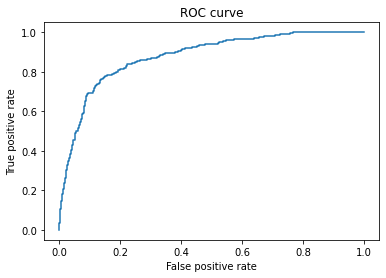

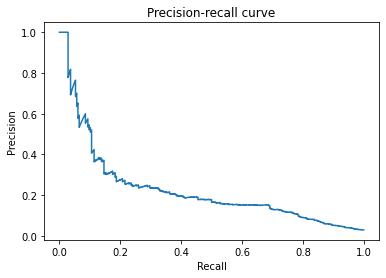

In [12]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

# n_estimators=400, max_depth=12 and no class weighing gives the best result!

rf = RandomForestClassifier(random_state=2020, max_depth=12,\
                                   n_estimators=400)

#Combine train and val sets
X_train_val = np.vstack((X_train, X_val))
y_train_val = np.concatenate((y_train, y_val), axis=0)

rf.fit(X_train_val, y_train_val)

y_score = rf.predict(X_test)
y_pred = rf.predict_proba(X_test)[:, 1]
print(confusion_matrix(y_test, y_score))
print(classification_report(y_test, y_score))
fpr, tpr, auc_th = roc_curve(y_test, y_pred)
precision, recall, pr_th = precision_recall_curve(y_test, y_pred)

plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-recall curve')
plt.show()

In [13]:
np.where(recall>0.5)

(array([   0,    1,    2, ..., 7423, 7424, 7425]),)

In [16]:
pr_th[7425]

0.0946425886277932

In [27]:
y_pred_0094 = y_pred>0.094
y_pred_0094 = y_pred_0094.astype(int)
y_pred_0094.sum()

765

In [30]:
print(confusion_matrix(y_test, y_pred_0095))
print(classification_report(y_test, y_pred_0095))

[[9782  618]
 [ 123  123]]
              precision    recall  f1-score   support

           0       0.99      0.94      0.96     10400
           1       0.17      0.50      0.25       246

    accuracy                           0.93     10646
   macro avg       0.58      0.72      0.61     10646
weighted avg       0.97      0.93      0.95     10646



In [31]:
feat_imp = pd.DataFrame({'feature': train_df.drop(columns=['patientunitstayid', 'aki_label']).columns , 'importance': rf.feature_importances_})
feat_imp.sort_values(by='importance', ascending=False, inplace=True)
feat_imp

,feature,importance
35,max_result_creatinine,0.064910
50,delta_result_creatinine,0.042096
20,min_result_creatinine,0.040992
25,max_result_BUN,0.032760
40,delta_result_BUN,0.028524
...,...,...
76,organ_system_Metabolic/Endocrine,0.000759
62,ethnicity_Native American,0.000753
80,organ_system_Transplant,0.000531
74,organ_system_Genitourinary,0.000514


Text(0.5, 1.0, 'Feature importance')

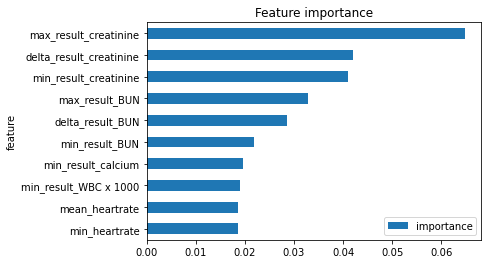

In [34]:
feat_imp[:10].sort_values(by='importance', ascending=True).plot.barh(y='importance', x='feature')
plt.title('Feature importance')

In [48]:
"""
import shap

# load JS visualization code to notebook
shap.initjs()

# train XGBoost model
#X,y = shap.datasets.boston()
#model = xgboost.train({"learning_rate": 0.01}, xgboost.DMatrix(X, label=y), 100)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)
"""

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value[1][0], shap_values[1][0])

IndexError: invalid index to scalar variable.

In [44]:
# visualize the training set predictions
shap.force_plot(explainer.expected_value, shap_values[1], X_train_val)

Exception: In v0.20 force_plot now requires the base value as the first parameter! Try shap.force_plot(explainer.expected_value, shap_values) or for multi-output models try shap.force_plot(explainer.expected_value[0], shap_values[0]).

In [51]:
shap_values = shap.TreeExplainer(rf).shap_values(X_train_val)
shap.summary_plot(shap_values, X_train_val, plot_type="bar")

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


SHAPError: Additivity check failed in TreeExplainer! Please ensure the data matrix you passed to the explainer is the same shape that the model was trained on. If your data shape is correct then please report this on GitHub. Consider retrying with the feature_perturbation='interventional' option. This check failed because for one of the samples the sum of the SHAP values was 0.014290, while the model output was -3105036184601417870297958976925005110513772034233393222278104076052101905372753772661756817657292955900975461394262146412343160088229628782888574550082362278408909952041699811100530571263196889650525998387432937501785693707632115712.000000. If this difference is acceptable you can set check_additivity=False to disable this check.

In [50]:
shap_values[1][0]

array([ 6.67591141e-04, -9.51177011e-05, -6.48034783e-05, -5.13933713e-05,
       -2.32762958e-04, -2.09712859e-04, -2.14447824e-04, -3.95095440e-04,
        2.92264098e-05, -3.79047276e-04, -1.37582794e-03, -2.25565425e-05,
        1.70164944e-04, -1.59481404e-04, -1.23016180e-05, -2.72465910e-05,
       -1.66276509e-04, -7.83742094e-04, -7.16174298e-04, -1.24815074e-04,
       -3.49901712e-03, -1.66903913e-04, -2.63900906e-04,  1.61668095e-05,
       -1.47290032e-04, -1.04670901e-03,  2.78409867e-05,  3.01452075e-05,
       -1.18672778e-04,  7.45304871e-05, -1.66511216e-05, -2.15658046e-04,
       -2.57956079e-04, -3.54491452e-04, -1.54386401e-04, -5.83386648e-03,
        2.12424805e-05, -9.29801600e-05, -3.77947306e-04, -1.77807618e-04,
       -1.66453695e-05, -2.41383837e-04, -7.82124926e-05, -7.08258718e-05,
       -1.10777471e-04, -2.24829339e-04, -2.04740858e-04, -1.54601992e-04,
       -2.64074916e-04, -1.88037317e-05, -2.41127407e-03, -2.54314743e-04,
       -2.15812222e-04, -

Text(0.5, 1.0, 'Min and max creatinine levels for both classes')

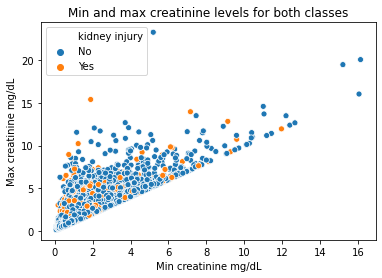

In [81]:
import seaborn as sns
train_df.loc[train_df['aki_label']==0, 'kidney injury' ]= 'No'
train_df.loc[train_df['aki_label']==1, 'kidney injury' ]= 'Yes'

sns.scatterplot(x='min_result_creatinine', y='max_result_creatinine', hue='kidney injury', data=train_df)
plt.xlabel('Min creatinine mg/dL')
plt.ylabel('Max creatinine mg/dL')
plt.title('Min and max creatinine levels for both classes')

Text(0.5, 1.0, 'Max lab measurements for BUN and WBC for both classes')

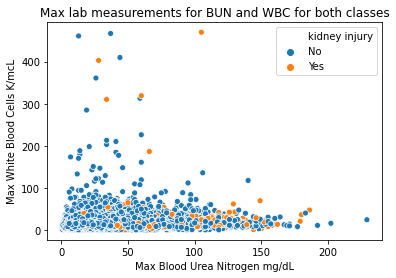

In [80]:
import seaborn as sns

sns.scatterplot(x='max_result_BUN', y='max_result_WBC x 1000', hue='kidney injury', data=train_df)
plt.xlabel('Max Blood Urea Nitrogen mg/dL')
plt.ylabel('Max White Blood Cells K/mcL')
plt.title('Max lab measurements for BUN and WBC for both classes')